# 三种分类和三种聚类算法在鸢尾花数据集上的实现
请务必将iris数据集的调用路径改为对应文件路径后再运行代码

In [1]:
import os
os.chdir(os.path.expanduser("~"))

In [2]:
##利用在UCI上下载的鸢尾花数据集进行分析处理
import pandas as pd
import numpy as np
iris = pd.read_csv('Documents/iris.csv', header=0, na_values='?')##数据库的调用位置在实际运行时请改成对应文件路径
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from sklearn import metrics
import time

In [4]:
##预处理，查看是否存在缺失值
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


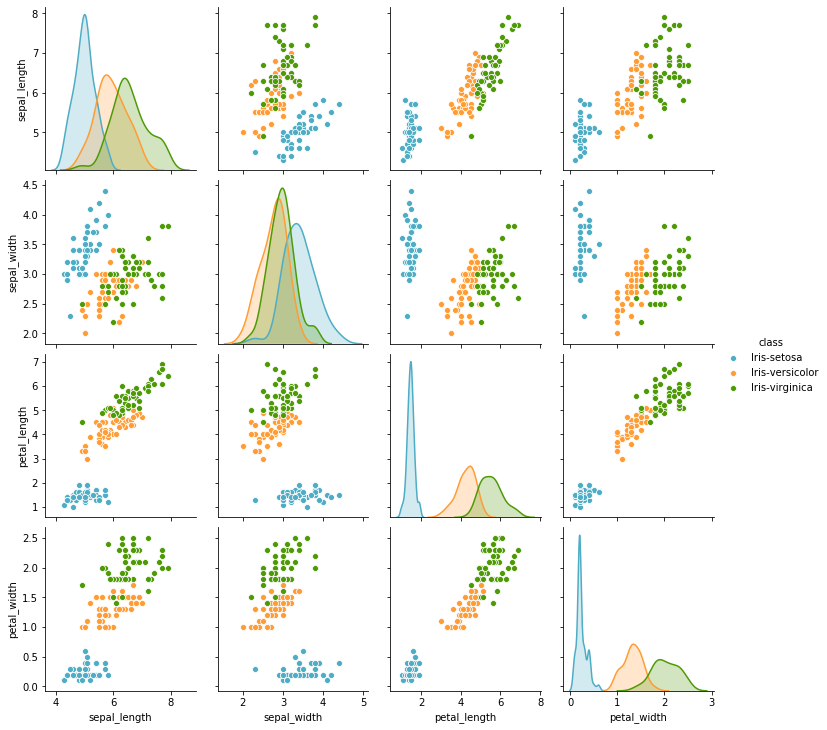

In [5]:
##将鸢尾花数据各个要素间的关系可视化
color = ['#4EACC5', '#FF9C34', '#4E9A06']
g = sns.pairplot(data=iris, palette=color, hue='class')

In [6]:
##将判断鸢尾花种类的四种要素存入i中
i = iris.drop(columns=['class'], axis=1)
i.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [7]:
##在iris中新增一列species，并将鸢尾花的种类数字化后存入
iris['species']=iris['class']
iris['species'].replace({'Iris-setosa':0, 'Iris-versicolor':1,  'Iris-virginica':2}, inplace=True)
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,species
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0
5,4.6,3.4,1.4,0.3,Iris-setosa,0
6,5.0,3.4,1.5,0.2,Iris-setosa,0
7,4.4,2.9,1.4,0.2,Iris-setosa,0
8,4.9,3.1,1.5,0.1,Iris-setosa,0
9,5.4,3.7,1.5,0.2,Iris-setosa,0


kmeans

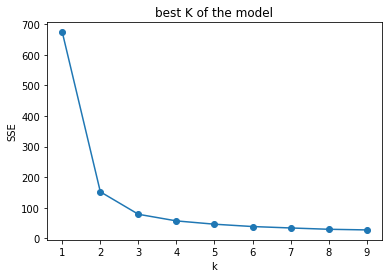

In [8]:
##用肘方法选择用kmeans方法分析时最好的k
SSE = []  
for k in range(1,10):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(i)
    SSE.append(estimator.inertia_) 
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.title('best K of the model')
plt.show()

In [9]:
##用kmeans方法进行聚类，并记录运行时间
n_clusters = 3

start = time.time()
cls = KMeans(n_clusters).fit(i)
end = time.time()
y_pre = cls.predict(i)

print('Running time: %s Seconds'%(end-start))

Running time: 0.02469491958618164 Seconds


In [10]:
y_true = np.array(iris.species[:])

In [11]:
##用兰德系数评价该聚类分析的结果
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.7266293901799756

利用petal_length, petal_width两个元素用kmeans进行聚类分析。

In [12]:
i1 = iris.drop(columns=['class','sepal_width','sepal_length'], axis=1)

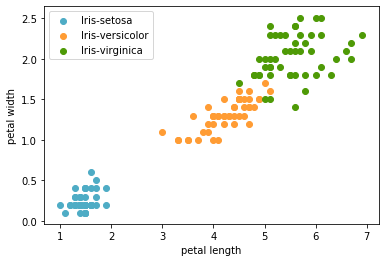

In [13]:
##petal length，petal width两维度下的散点图
x0 = i1[i1.species == 0]
x1 = i1[i1.species == 1]
x2 = i1[i1.species == 2]
plt.scatter(x0.petal_length, x0.petal_width, c = color[0], label='Iris-setosa')
plt.scatter(x1.petal_length, x1.petal_width, c = color[1], label='Iris-versicolor')
plt.scatter(x2.petal_length, x2.petal_width, c = color[2],label='Iris-virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [14]:
i1 = i1.drop(columns=['species'], axis=1)

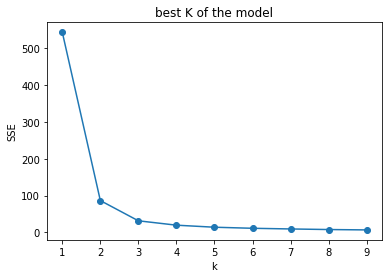

In [15]:
SSE = []  
for k in range(1,10):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(i1)
    SSE.append(estimator.inertia_) 
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.title('best K of the model')
plt.show()

In [16]:
n_clusters = 3

start = time.time()
cls = KMeans(n_clusters).fit(i1)
end = time.time()
y_pre = cls.predict(i1)
label_pred = cls.labels_

print('Running time: %s Seconds'%(end-start))

Running time: 0.028742313385009766 Seconds


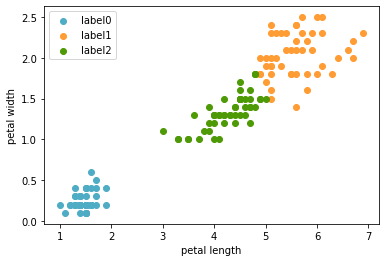

In [17]:
##画出petal length，petal width聚类分析后的散点图
x0 = i1[label_pred == 1]
x1 = i1[label_pred == 2]
x2 = i1[label_pred == 0]
plt.scatter(x0.petal_length, x0.petal_width, c = color[0], label='label0')
plt.scatter(x1.petal_length, x1.petal_width, c = color[1], label='label1')
plt.scatter(x2.petal_length, x2.petal_width, c = color[2], label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [18]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.8841528306984797

利用sepal_length, sepal_width两个元素用kmeans进行聚类分析。

In [19]:
i2 = iris.drop(columns=['class','petal_width','petal_length'], axis=1)

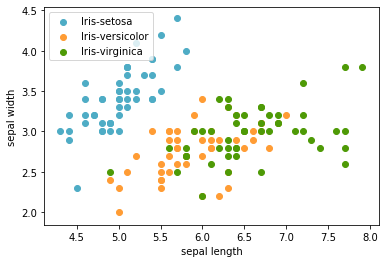

In [20]:
##sepal length，sepal width两维度下的散点图
x0 = i2[i2.species == 0]
x1 = i2[i2.species == 1]
x2 = i2[i2.species == 2]
plt.scatter(x0.sepal_length, x0.sepal_width, c = color[0], label='Iris-setosa')
plt.scatter(x1.sepal_length, x1.sepal_width, c = color[1], label='Iris-versicolor')
plt.scatter(x2.sepal_length, x2.sepal_width, c = color[2],label='Iris-virginica')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

In [21]:
i2 = i2.drop(columns=['species'], axis=1)

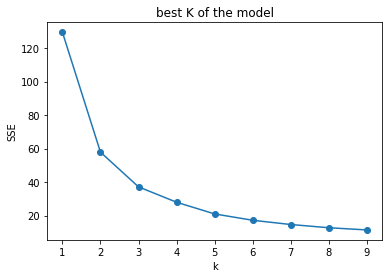

In [22]:
SSE = []  
for k in range(1,10):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(i2)
    SSE.append(estimator.inertia_) 
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.title('best K of the model')
plt.show()

In [23]:
n_clusters = 3

start = time.time()
cls = KMeans(n_clusters).fit(i2)
end = time.time()
y_pre = cls.predict(i2)
label_pred = cls.labels_
print('Running time: %s Seconds'%(end-start))

Running time: 0.03283405303955078 Seconds


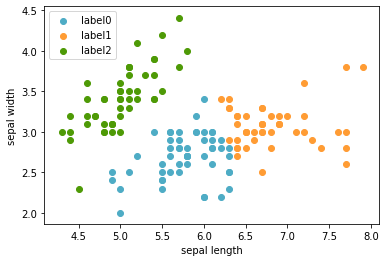

In [24]:
##画出sepal length，sepal width聚类分析后的散点图
x0 = i2[label_pred == 0]
x1 = i2[label_pred == 2]
x2 = i2[label_pred == 1]
plt.scatter(x0.sepal_length, x0.sepal_width, c = color[0], label='label0')
plt.scatter(x1.sepal_length, x1.sepal_width, c = color[1], label='label1')
plt.scatter(x2.sepal_length, x2.sepal_width, c = color[2],label='label2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

In [25]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.5952933816021023

用层次聚类对iris数据集进行分析

In [26]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [27]:
##选择计算两个聚类的距离的最佳算法
hc_complete = linkage(i, "complete")
hc_average = linkage(i, "average")
hc_single = linkage(i, "single")
hc_ward = linkage(i, "ward")

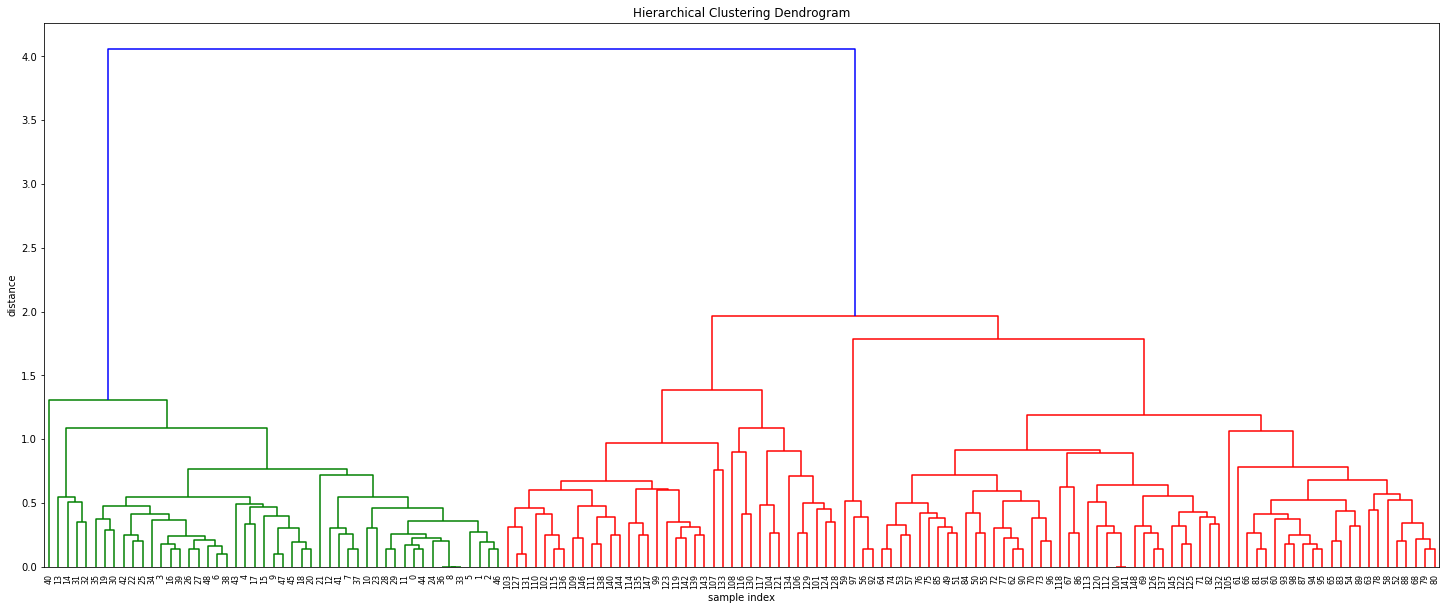

In [28]:
##经过尝试，在用四个要素进行层次聚类时采用两个簇的样本对之间距离的平均值即linkage="average" 
##构建聚类树
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('sample index')
plt.ylabel('distance')
start = time.time()
dendrogram(hc_average, leaf_rotation=90, leaf_font_size=8) 
end = time.time()
t1 = end-start
plt.show()

In [29]:
##对树进行剪枝，使其生成不同的簇，并计算运行时间
start = time.time()
y_pre = cut_tree(hc_average, n_clusters = 3)
end = time.time()
print('Running time: %s Seconds'%((end-start)+t1))

Running time: 0.194016695022583 Seconds


In [30]:
##计算兰德系数
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre[:,0])
adjusted_rand_s

0.7559888791560345

利用petal_length, petal_width两个元素用层次聚类进行聚类分析。操作类似不再在注释里详细说明。

In [31]:
i1 = iris.drop(columns=['class','sepal_width','sepal_length','species'], axis=1)

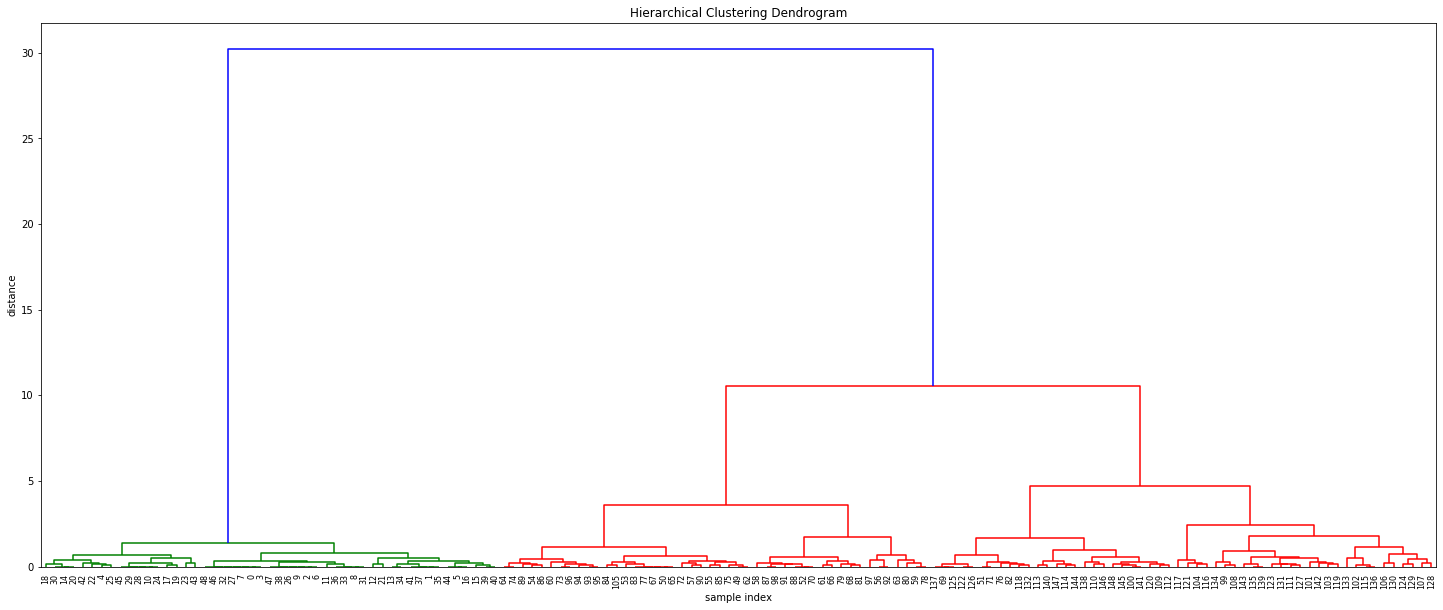

In [32]:
##经过尝试，将计算两个聚类之间距离的算法修改为离差平方和法，即linkage="ward"
hc_ward = linkage(i1, "ward")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('sample index')
plt.ylabel('distance')
start = time.time()
dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=8) 
end = time.time()
t1 = end-start
plt.show()

In [33]:
start = time.time()
y_pre = cut_tree(hc_ward, n_clusters = 3)
end = time.time()
print('Running time: %s Seconds'%((end-start)+t1))

Running time: 0.12224102020263672 Seconds


In [34]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre[:,0])
adjusted_rand_s

0.8842504848377997

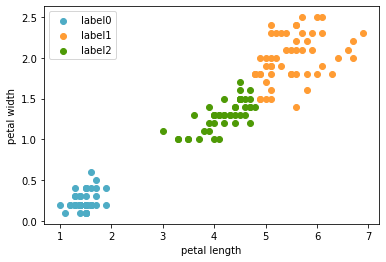

In [35]:
##生成层次聚类分析时petal length和petal width的散点图
x0 = i1[y_pre == 0]
x1 = i1[y_pre == 2]
x2 = i1[y_pre == 1]
plt.scatter(x0.petal_length, x0.petal_width, c = color[0], label='label0')
plt.scatter(x1.petal_length, x1.petal_width, c = color[1], label='label1')
plt.scatter(x2.petal_length, x2.petal_width, c = color[2],label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

利用sepal_length, sepal_width两个元素用层次聚类进行聚类分析。操作类似不再在注释里详细说明。

In [36]:
i2 = iris.drop(columns=['class','petal_width','petal_length','species'], axis=1)

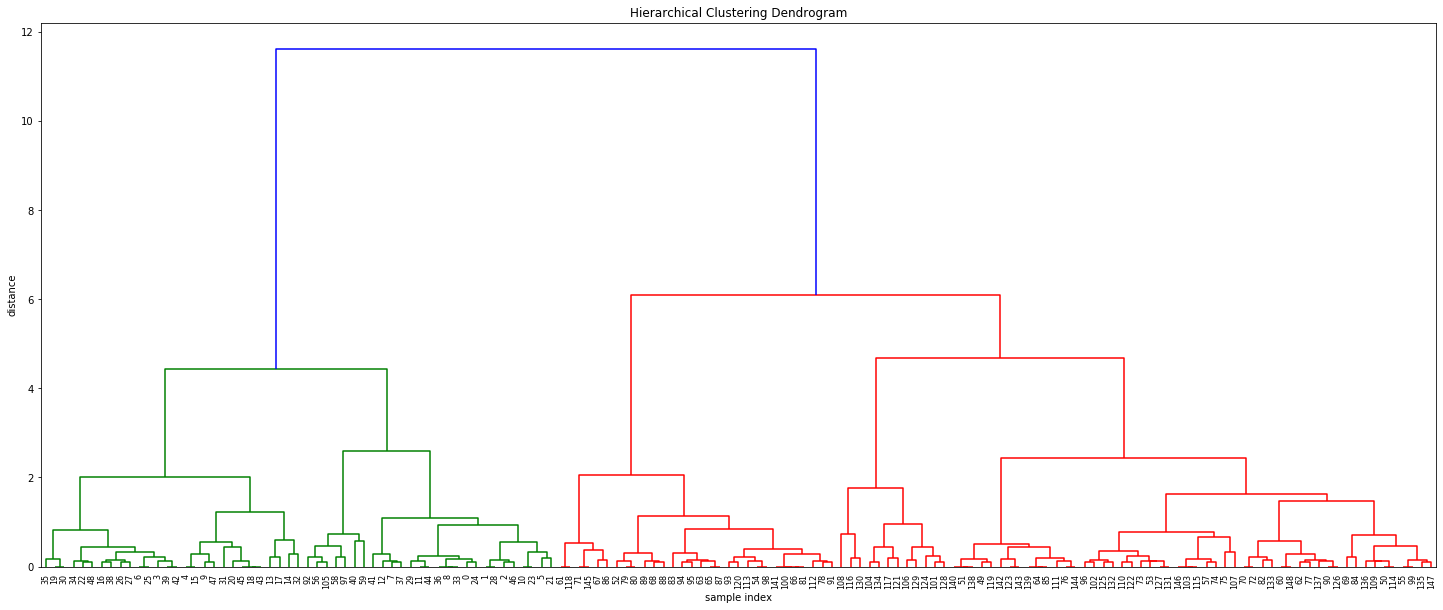

In [37]:
hc_ward = linkage(i2, "ward")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('sample index')
plt.ylabel('distance')
start = time.time()
dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=8) 
end = time.time()
plt.show()

In [38]:
start = time.time()
y_pre = cut_tree(hc_ward, n_clusters = 3)
end = time.time()
print('Running time: %s Seconds'%((end-start)+t1))

Running time: 0.12317490577697754 Seconds


In [39]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre[:,0])
adjusted_rand_s

0.5057529587994763

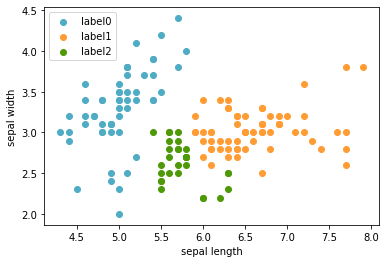

In [40]:
x0 = i2[y_pre == 0]
x1 = i2[y_pre == 1]
x2 = i2[y_pre == 2]
plt.scatter(x0.sepal_length, x0.sepal_width, c = color[0], label='label0')
plt.scatter(x1.sepal_length, x1.sepal_width, c = color[1], label='label1')
plt.scatter(x2.sepal_length, x2.sepal_width, c = color[2],label='label2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

DBSCAN

In [41]:
i = iris.drop(columns=['class'], axis=1)

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
i = min_max_scaler.fit_transform(i)

In [43]:
##根据兰德系数的大小确定DBSCAN聚类中最合适的领域半径和给定点在Eps领域半径内成为核心对象的最小点数
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=20)
start = time.time()
dbscan.fit(i)
end = time.time()
y_pre = dbscan.labels_
print('Running time: %s Seconds'%(end-start))

Running time: 0.0022058486938476562 Seconds


In [44]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.9707399210873401

利用petal_length, petal_width两个元素用DBSCAN进行聚类分析。操作类似不再在注释里详细说明。

In [45]:
i1 = iris.drop(columns=['class','sepal_width','sepal_length','species'], axis=1)

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
i1 = min_max_scaler.fit_transform(i1)

In [47]:
dbscan = DBSCAN(eps=0.1, min_samples=30)
start = time.time()
dbscan.fit(i1)
end = time.time()
y_pre = dbscan.labels_
print('Running time: %s Seconds'%(end-start))

Running time: 0.0016241073608398438 Seconds


In [48]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.7402481093726713

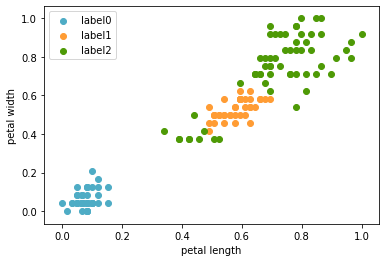

In [49]:
x0 = i1[y_pre == 0]
x1 = i1[y_pre == 1]
x2 = i1[y_pre == -1]
plt.scatter(x0[:,0], x0[:,1], c = color[0], label='label0')
plt.scatter(x1[:,0], x1[:,1], c = color[1], label='label1')
plt.scatter(x2[:,0], x2[:,1], c = color[2],label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

利用sepal_length, sepal_width两个元素用DBSCAN进行聚类分析。操作类似不再在注释里详细说明。

In [50]:
i2 = iris.drop(columns=['class','petal_width','petal_length','species'], axis=1)

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
i2 = min_max_scaler.fit_transform(i2)

In [52]:
dbscan = DBSCAN(eps=0.2, min_samples=45)
start = time.time()
dbscan.fit(i2)
end = time.time()
y_pre = dbscan.labels_
print('Running time: %s Seconds'%(end-start))

Running time: 0.0020492076873779297 Seconds


In [53]:
adjusted_rand_s = metrics.adjusted_rand_score(y_true,y_pre)
adjusted_rand_s

0.45133875139955987

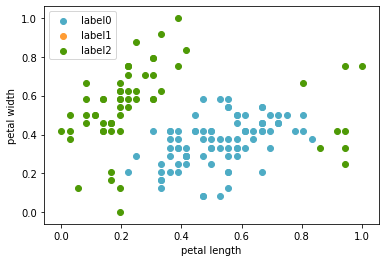

In [54]:
x0 = i2[y_pre == 0]
x1 = i2[y_pre == 1]
x2 = i2[y_pre == -1]
plt.scatter(x0[:,0], x0[:,1], c = color[0], label='label0')
plt.scatter(x1[:,0], x1[:,1], c = color[1], label='label1')
plt.scatter(x2[:,0], x2[:,1], c = color[2],label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

分类

SVM

In [55]:
i_target = np.array(iris['species'])

In [56]:
##对数据进行归一化处理
i = iris.drop(columns=['class','species'], axis=1)
i_data = np.array(i)
min_max_scaler = preprocessing.MinMaxScaler()
i_data = min_max_scaler.fit_transform(i_data)

In [57]:
##将数据随机分为训练集和测试集，测试集占总数据的60%
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(i_data, i_target, random_state = 1, train_size = 0.6)

In [58]:
##将SVM的结果可视化的函数并输出离超平面最近的点的个数
import matplotlib as mpl
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [60]:
##用线性可分支持向量机求解，利用交叉验证选择最合适的C
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=3, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
clf.cv_results_

{'mean_fit_time': array([0.0007906 , 0.00046794, 0.00047557, 0.00042272, 0.00038298,
        0.00039228, 0.00047636]),
 'std_fit_time': array([1.99389502e-04, 3.76239996e-05, 6.03201623e-05, 3.51282626e-05,
        1.47875054e-05, 3.30765622e-05, 8.13523415e-05]),
 'mean_score_time': array([0.0003686 , 0.00032401, 0.00027235, 0.00026027, 0.00028364,
        0.00026266, 0.00030104]),
 'std_score_time': array([6.75817499e-05, 7.14439350e-05, 1.41001069e-05, 1.44583827e-05,
        5.18125258e-05, 3.18663375e-05, 4.72278794e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.53333333, 0.53333333, 0.86666667, 1.        , 1.        ,
        1.        , 0.93333333]),
 'split1_test_score': array([0.6       , 0.6     

In [62]:
clf.best_params_

{'C': 1}

In [63]:
##代入C=1，训练SVM分类器
start = time.time()
svc = SVC(C=1, kernel='linear') 
svc.fit(x_train, y_train)
end = time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.0008509159088134766 Seconds


In [64]:
##输出测试数据集的准确率
y_pred = svc.predict(x_test)
np.mean(y_test == y_pred)

0.95

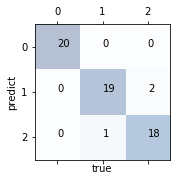

In [65]:
##生成混淆矩阵
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y_test,y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

利用petal_length, petal_width两个元素用SVM进行分类。操作类似不再在注释里详细说明。

In [66]:
i1 = iris.drop(columns=['class','sepal_width','sepal_length','species'], axis=1)

In [67]:
i1_data = np.array(i1)

In [68]:
x1_train, x1_test, y1_train, y1_test = ms.train_test_split(i1_data, i_target, random_state = 1, train_size = 0.6)

In [69]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=3, scoring='accuracy')
clf.fit(x1_train, y1_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
clf.best_params_

{'C': 1}

Running time: 0.0009400844573974609 Seconds


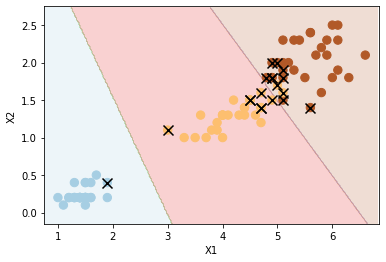

Number of support vectors:  19


In [71]:
##用前面定义的plot_svc函数输出SVM分类结果图，标记叉的点代表support vectors
start=time.time()
svc = SVC(C=1, kernel='linear') 
svc.fit(x1_train, y1_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plot_svc(svc, x1_train, y1_train)

In [72]:
y1_pred = svc.predict(x1_test)
np.mean(y1_test == y1_pred)

0.9666666666666667

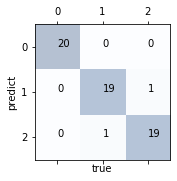

In [73]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y1_test,y1_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

利用sepal_length, sepal_width两个元素用SVM进行分类。操作类似不再在注释里详细说明。

In [74]:
i2 = iris.drop(columns=['class','petal_width','petal_length','species'], axis=1)

In [75]:
i2_data = np.array(i2)

In [76]:
x2_train, x2_test, y2_train, y2_test = ms.train_test_split(i2_data, i_target, random_state = 1, train_size = 0.6)

In [77]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=3, scoring='accuracy')
clf.fit(x2_train, y2_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
clf.best_params_

{'C': 0.1}

Running time: 0.0014190673828125 Seconds


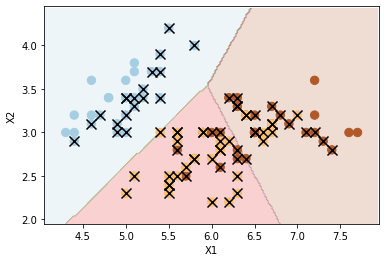

Number of support vectors:  75


In [79]:
start=time.time()
svc = SVC(C=0.1, kernel='linear') 
svc.fit(x2_train, y2_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plot_svc(svc, x2_train, y2_train)

In [80]:
y2_pred = svc.predict(x2_test)
np.mean(y2_test == y2_pred)

0.8166666666666667

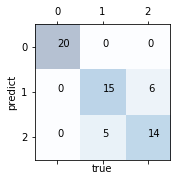

In [81]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y2_test,y2_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

决策树

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
start=time.time()
clf = DecisionTreeClassifier(criterion = "gini", max_depth=6, min_samples_leaf=4)
clf.fit(x_train, y_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.0012240409851074219 Seconds


In [84]:
##输出决策树算法下的预测测试集的正确率
y_pred = clf.predict(x_test)
np.mean(y_test == y_pred)

0.95

In [85]:
##输出决策树的图，转换为png格式的图形在报告里
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="mytree.dot", feature_names = i.columns)

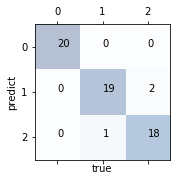

In [86]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y_test,y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

利用petal_length, petal_width两个元素用决策树进行分类。操作类似不再在注释里详细说明。

In [87]:
start=time.time()
clf = DecisionTreeClassifier(criterion = "gini", max_depth=6, min_samples_leaf=4)
clf.fit(x1_train, y1_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.0010440349578857422 Seconds


In [88]:
y1_pred = clf.predict(x1_test)
np.mean(y1_test == y1_pred)

0.95

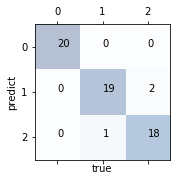

In [89]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y1_test,y1_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

In [90]:
export_graphviz(clf, out_file="mytree1.dot", feature_names = i1.columns)

利用sepal_length, sepal_width两个元素用决策树进行分类。操作类似不再在注释里详细说明。

In [91]:
start=time.time()
clf = DecisionTreeClassifier(criterion = "gini", max_depth=6, min_samples_leaf=4)
clf.fit(x2_train, y2_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.0014362335205078125 Seconds


In [92]:
y2_pred = clf.predict(x2_test)
np.mean(y2_test == y2_pred)

0.6833333333333333

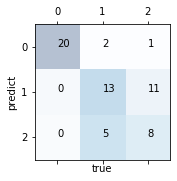

In [93]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y2_test,y2_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

In [94]:
export_graphviz(clf, out_file="mytree2.dot", feature_names = i1.columns)

KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier as KNN  

In [96]:
start=time.time()
trained = KNN(n_neighbors=10).fit(x_train, y_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 0.0006299018859863281 Seconds


In [97]:
##输出KNN对测试集进行预测的准确率
y_pred = trained.predict(x_test)
np.mean(y_test == y_pred)

0.9666666666666667

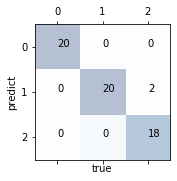

In [98]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y_test,y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

利用petal_length, petal_width两个元素用KNN进行分类。

In [99]:
start=time.time()
trained1 = KNN(n_neighbors=10).fit(x1_train, y1_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))
y1_pred = trained1.predict(x1_test)
np.mean(y1_test == y1_pred)

Running time: 0.0006096363067626953 Seconds


0.95

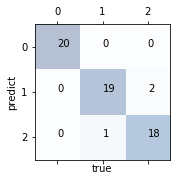

In [100]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y1_test,y1_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

利用sepal_length, sepal_width两个元素用KNN进行分类。

In [101]:
start=time.time()
trained2 = KNN(n_neighbors=10).fit(x2_train, y2_train)
end=time.time()
print('Running time: %s Seconds'%(end-start))
y2_pred = trained2.predict(x2_test)
np.mean(y2_test == y2_pred)

Running time: 0.00086212158203125 Seconds


0.7666666666666667

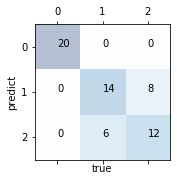

In [102]:
from sklearn.metrics import confusion_matrix
 
confmat = confusion_matrix(y2_test,y2_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for a in range(confmat.shape[0]):
    for b in range(confmat.shape[1]):
        ax.text(x=a,y=b,s=confmat[a][b])
plt.xlabel('true')
plt.ylabel('predict')
plt.show()